# Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Load dataset

In [2]:
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [3]:
for i in range(X.shape[-1]):
    print(f'attr {i + 1}.  <', np.min(X[:, i]), ':', np.max(X[:, i]), '>')

attr 1.  < 4.3 : 7.9 >
attr 2.  < 2.0 : 4.4 >
attr 3.  < 1.0 : 6.9 >
attr 4.  < 0.1 : 2.5 >


# Prepare dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

<BarContainer object of 3 artists>

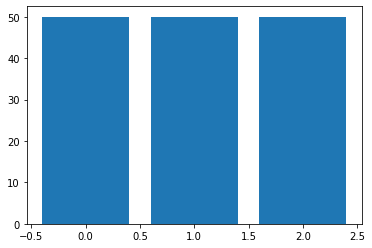

In [5]:
label_counter = Counter(y.squeeze().tolist())
plt.bar(label_counter.keys(), label_counter.values())

# Model

In [6]:
gnb_model = GaussianNB()

# Training

In [7]:
trained_gnb_model = gnb_model.fit(X_train, y_train)

# Prediction

In [8]:
y_gnb_pred = trained_gnb_model.predict(X_test)

In [9]:
def print_score(y_true, y_pred):
    print('Acc:      ', accuracy_score(y_true, y_pred))
    print('f1 avg:   ', f1_score(y_true, y_pred, average='macro'))    
    print('Recall:   ', recall_score(y_true, y_pred, average=None))
    print('Precision:', precision_score(y_true, y_pred, average=None))
    print('f1:       ', f1_score(y_true, y_pred, average=None))
    print('Confusion matrix:')
    print(confusion_matrix(y_true, y_pred))

In [10]:
print_score(y_test, y_gnb_pred)

Acc:       0.9466666666666667
f1 avg:    0.9488636363636364
Recall:    [1.         1.         0.83333333]
Precision: [1.         0.88235294 1.        ]
f1:        [1.         0.9375     0.90909091]
Confusion matrix:
[[21  0  0]
 [ 0 30  0]
 [ 0  4 20]]


# Discretization

## Categorical

In [11]:
discretizer_uniform = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
fitted_discretizer_uniform = discretizer_uniform.fit(X_train)

In [12]:
X_train_fitted = fitted_discretizer_uniform.fit_transform(X_train)
X_test_fitted = fitted_discretizer_uniform.transform(X_test)
X_train_fitted[:3]

array([[0., 4., 0., 0.],
       [4., 4., 6., 7.],
       [2., 1., 3., 4.]])

In [13]:
cat_model = CategoricalNB(alpha=0)
trained_cat_model = cat_model.fit(X_train_fitted, y_train)
y_cat_pred = trained_cat_model.predict(X_test_fitted)

In [14]:
print('Acc:      ', accuracy_score(y_test, y_cat_pred))
print('Recall:   ', recall_score(y_test, y_cat_pred, average=None))
print('Precision:', precision_score(y_test, y_cat_pred, average=None))
print('f1:       ', f1_score(y_test, y_cat_pred, average=None))

Acc:       0.92
Recall:    [1.         0.96666667 0.79166667]
Precision: [1.         0.85294118 0.95      ]
f1:        [1.         0.90625    0.86363636]


In [15]:
confusion_matrix(y_test, y_cat_pred)

array([[21,  0,  0],
       [ 0, 29,  1],
       [ 0,  5, 19]])

## Multinomial

In [16]:
discretizer_uniform = KBinsDiscretizer(n_bins=10, encode='onehot', strategy='uniform')
fitted_discretizer_uniform = discretizer_uniform.fit(X_train)

In [17]:
X_train_fitted = fitted_discretizer_uniform.fit_transform(X_train)
X_test_fitted = fitted_discretizer_uniform.transform(X_test)
X_train_fitted[:3]

<3x40 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [18]:
mul_model = MultinomialNB()
trained_mul_model = mul_model.fit(X_train_fitted, y_train)
y_mul_pred = trained_mul_model.predict(X_test_fitted)

In [19]:
print('Acc:      ', accuracy_score(y_test, y_mul_pred))
print('Recall:   ', recall_score(y_test, y_mul_pred, average=None))
print('Precision:', precision_score(y_test, y_mul_pred, average=None))
print('f1:       ', f1_score(y_test, y_mul_pred, average=None))

Acc:       0.92
Recall:    [1.         0.96666667 0.79166667]
Precision: [1.         0.85294118 0.95      ]
f1:        [1.         0.90625    0.86363636]


In [20]:
confusion_matrix(y_test, y_mul_pred)

array([[21,  0,  0],
       [ 0, 29,  1],
       [ 0,  5, 19]])

# Bernoulli 

In [21]:
discretizer_uniform = KBinsDiscretizer(n_bins=10, encode='onehot', strategy='uniform')
X_train_fitted = discretizer_uniform.fit_transform(X_train)
X_test_fitted = discretizer_uniform.transform(X_test)

In [22]:
ber_model = BernoulliNB()
trained_ber_model = mul_model.fit(X_train_fitted, y_train)
y_ber_pred = trained_ber_model.predict(X_test_fitted)

In [23]:
print('Acc:      ', accuracy_score(y_test, y_ber_pred))
print('Recall:   ', recall_score(y_test, y_ber_pred, average=None))
print('Precision:', precision_score(y_test, y_ber_pred, average=None))
print('f1:       ', f1_score(y_test, y_ber_pred, average=None))

Acc:       0.92
Recall:    [1.         0.96666667 0.79166667]
Precision: [1.         0.85294118 0.95      ]
f1:        [1.         0.90625    0.86363636]


In [24]:
confusion_matrix(y_test, y_ber_pred)

array([[21,  0,  0],
       [ 0, 29,  1],
       [ 0,  5, 19]])